# Day 1:Plotting

Examples with Pandas and seaborn

In [14]:
%matplotlib inline 

In [15]:
import pandas as pd #pd=shortcut

FNAME = "http://www.stat.ucla.edu/~rgould/datasets/twins.dat" #assigned link to object FNAME

# ? for missing value with na_values
df= pd.read_csv(FNAME, sep='\t', na_values="?") 

<AxesSubplot:xlabel='AGE', ylabel='EDUCH'>

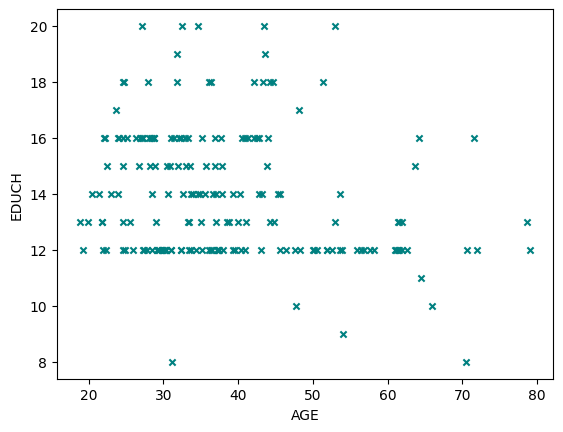

In [18]:
#years of schooling
df.plot.scatter(x="AGE", y="EDUCH", color="teal", marker="x")

In [19]:
# to close the powershell: CTRL + C or CTRL + Z

# adding matplotlib

In [21]:
import matplotlib.pyplot as plt

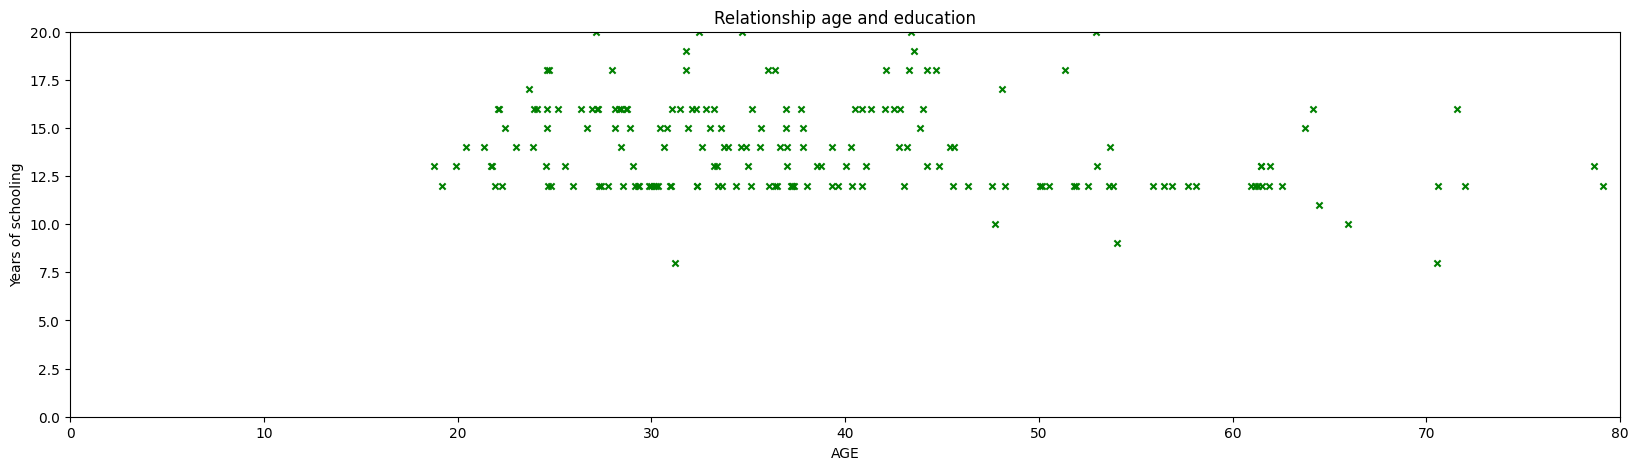

In [37]:
#additional features for plot
#also for saving
fig, ax=plt.subplots(figsize=(20,5))
df.plot.scatter(x="AGE", y="EDUCH", color="green", marker="x", ax=ax)
ax.set(ylabel="Years of schooling", title="Relationship age and education", ylim=(0,20),xlim=(0,80))
fig.savefig("scatter_age_educh.pdf")

In [51]:
df.loc[df["MALEL"] == 14, "MALEL"] = None
grouped=df.groupby(["WHITEL","MALEL"])

In [56]:
#Observtions for white/non white & Male. Multiindiex
sizes=grouped.size()
sizes.head()

WHITEL  MALEL
0       0.0       5
        1.0       6
1       0.0      94
        1.0      77
dtype: int64

In [57]:
#transpose
sizes.T

WHITEL  MALEL
0       0.0       5
        1.0       6
1       0.0      94
        1.0      77
dtype: int64

In [53]:
#turn into dataframe. 
#Lingo: column=index
#MALEL became column index, WHITEL became a rowIndez
sizes = sizes.unstack()
sizes.head()

MALEL,0.0,1.0
WHITEL,,
0,5,6
1,94,77


<AxesSubplot:xlabel='WHITEL,MALEL'>

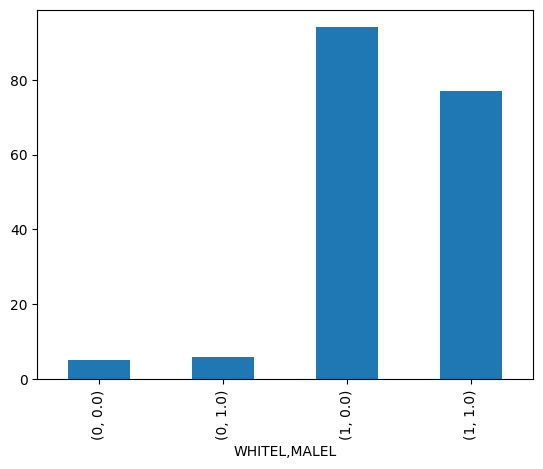

In [58]:
sizes.plot.bar()
#to make modifications to the plot, we may need to create an ax

In [60]:
#Check available Styles
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='WHITEL,MALEL'>

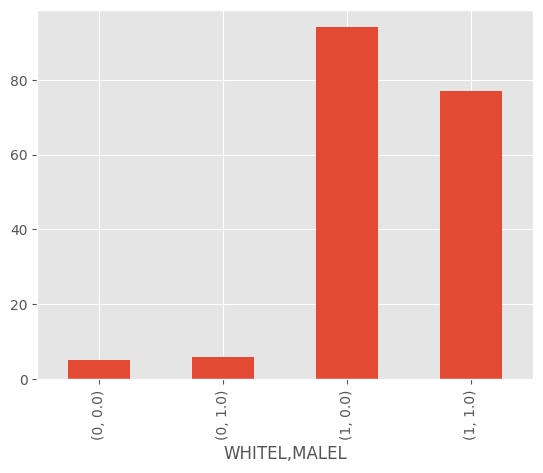

In [62]:
plt.style.use("ggplot")
sizes.plot.bar()


# Seaborn

In [64]:
import seaborn as sns

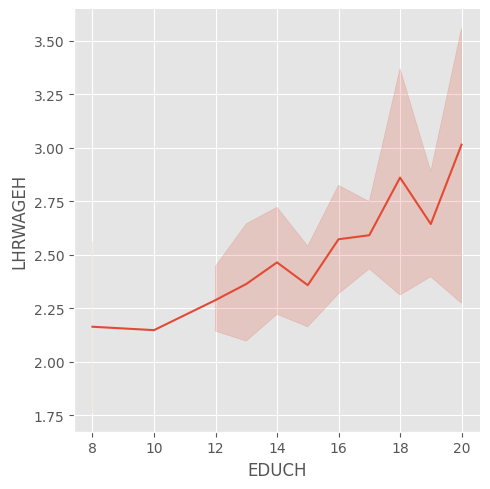

In [67]:
#relationship between yearas of schooling and wage
sns.relplot(x="EDUCH", y="LHRWAGEH", data=df, kind="line")

# Relationship

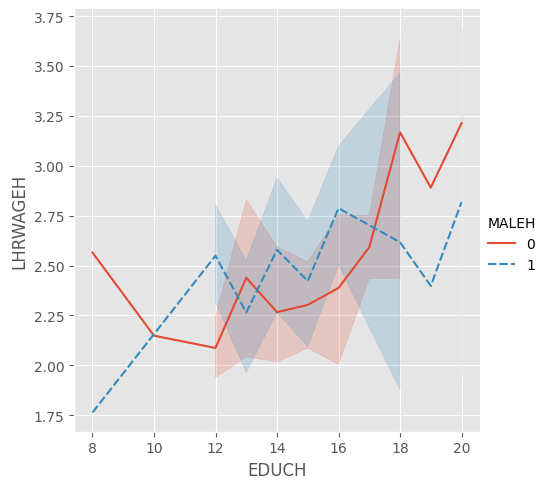

In [70]:
#relationship for males and females

sns.relplot(x="EDUCH", y="LHRWAGEH", data=df, kind="line", hue="MALEH", style="MALEH")

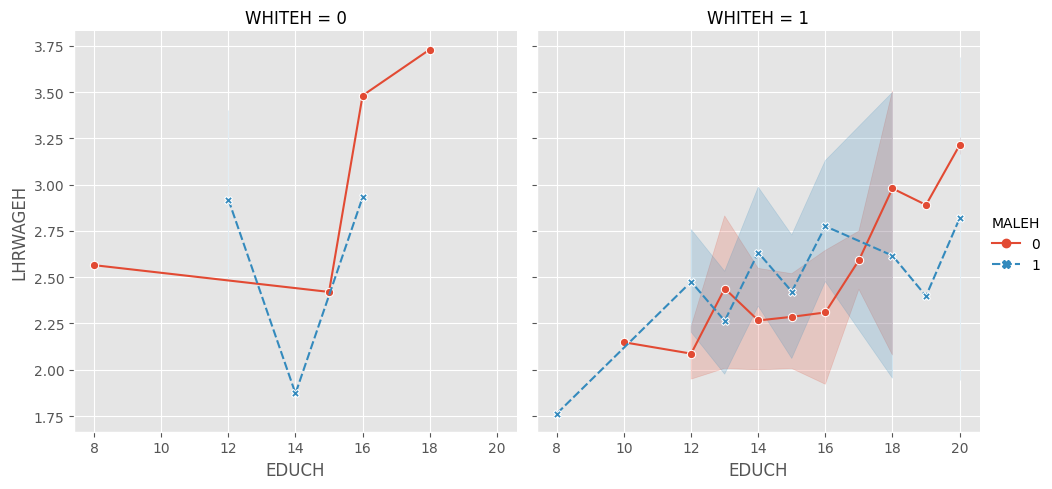

In [72]:
#Multiple plts side by side in different categories
sns.relplot(x="EDUCH", y="LHRWAGEH", data=df, kind="line", hue="MALEH", style="MALEH", markers=True, col="WHITEH")

# Categorical

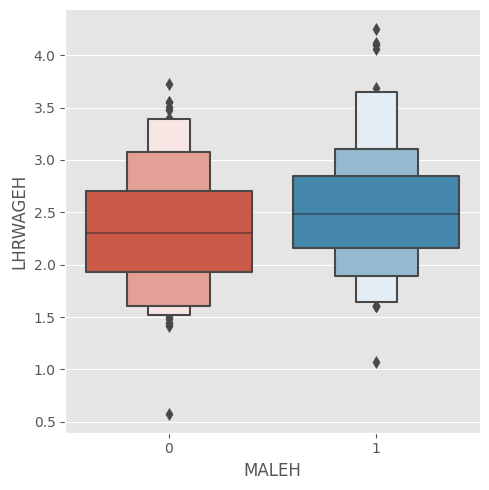

In [75]:
#For distributions on categrical basis
sns.catplot(x="MALEH", y="LHRWAGEH", data=df, kind="boxen")

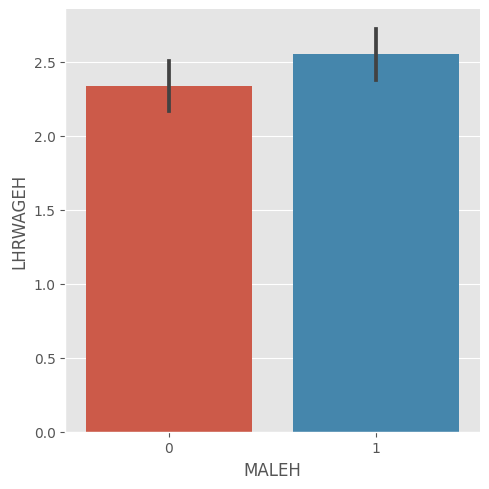

In [78]:
#change CI
sns.catplot(x="MALEH", y="LHRWAGEH", data=df, kind="bar", ci=99)

<AxesSubplot:xlabel='EDUCH', ylabel='LHRWAGEH'>

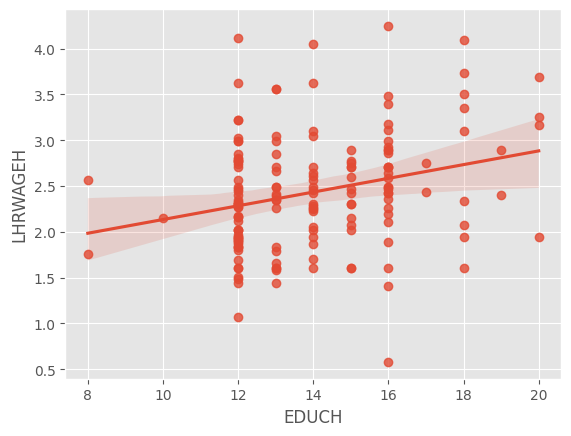

In [81]:
#Regression plot
sns.regplot (x="EDUCH", y="LHRWAGEH", data=df, marker="o", ci=99)

# Matricx plots

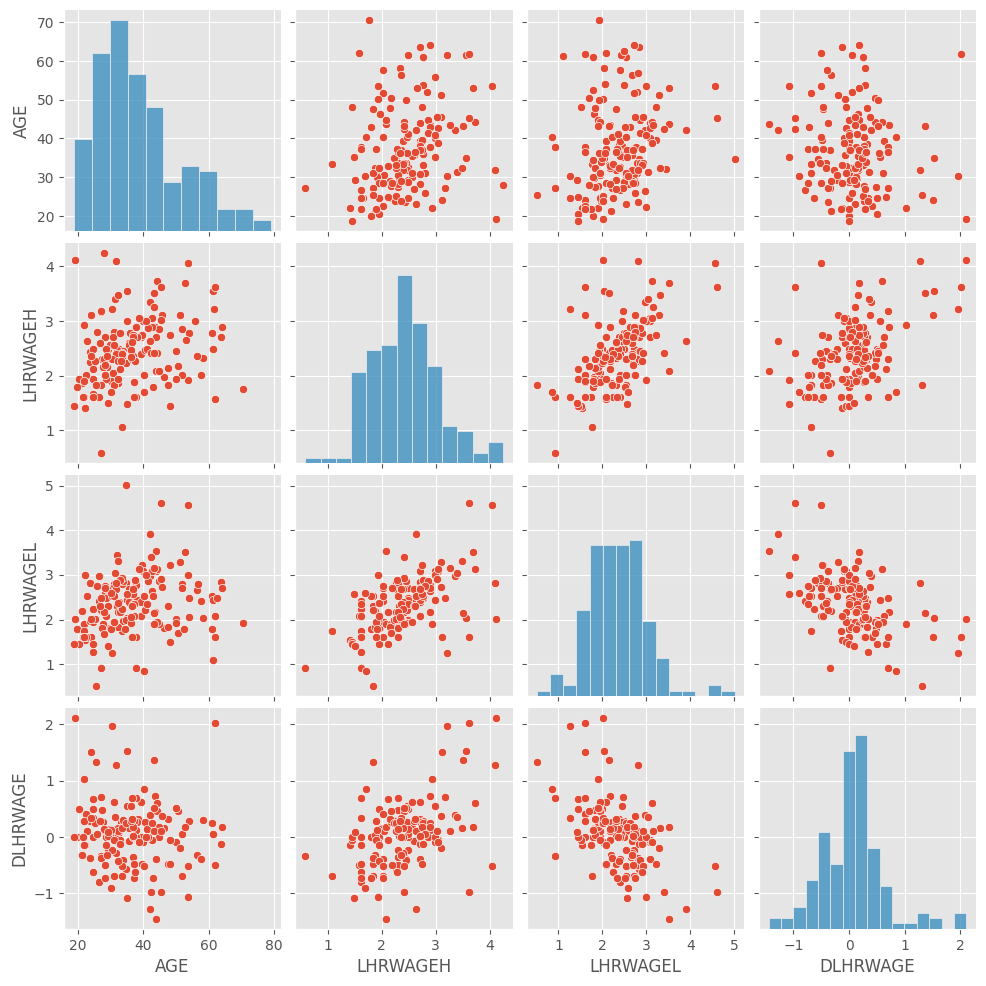

In [84]:
#Matrix plot: scatter everything against everything, wth a Kernel density 
#shows possible relationships

cols = ["AGE", "LHRWAGEH", "LHRWAGEL", "DLHRWAGE"]
sns.pairplot(data=df, vars=cols)


# Heatmaps

In [86]:
#crosstabulation
cross = pd.crosstab(df["WHITEL"],df["WHITEH"])
cross

WHITEH,0,1
WHITEL,,
0,10,1
1,2,170


<AxesSubplot:xlabel='WHITEH', ylabel='WHITEL'>

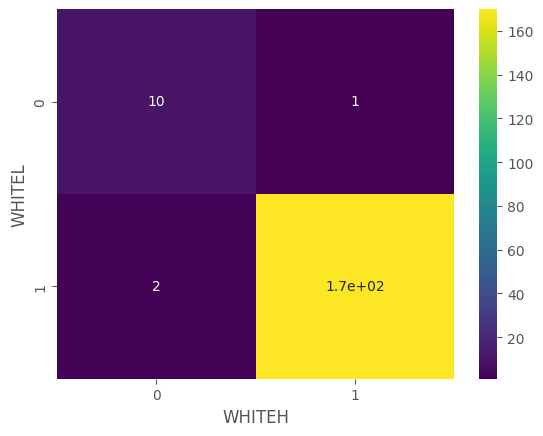

In [90]:
sns.heatmap(cross, annot=True, cmap="viridis")

<AxesSubplot:xlabel='WHITEH', ylabel='WHITEL'>

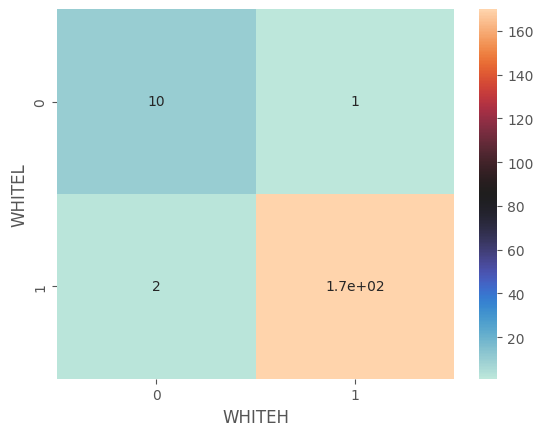

In [92]:
sns.heatmap(cross, annot=True, cmap="icefire")

In [93]:
#seabonr=long
#pandas= wide